In [0]:
import numpy as np 
import pandas as pd 

In [0]:
test = pd.read_csv("/test_tweets.csv")
train = pd.read_csv("/train_tweets.csv")

In [0]:
#!pip3 install nltk

In [7]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
import string
punctuations = string.punctuation
from nltk.corpus import stopwords
stopword = set(stopwords.words('english'))

In [9]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [10]:
import string

punctuations = string.punctuation

from nltk.corpus import stopwords

stopword = stopwords.words("english")

from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()

# creating a function to clean the text
def clean(text):
    
    #converting to lower case 
    clean_text = text.lower()
    
    # removing punctuations
    clean_text = "".join(p for p in clean_text if p not in punctuations)
    
    
    # removing stopwords
    words = clean_text.split()
    words =[w for w in words if w not in stopword]
    words =[w for w in words if w!='user']
    
    # lemmatization
    words = [lem.lemmatize(word, 'v') for word in words]
    words = [lem.lemmatize(word, 'n') for word in words]
    
    cleaned_text = " ".join(words)
    
    return cleaned_text

# checking if our function works correctly or not
clean("this is a @user Test Text for cleaning")

'test text clean'

In [11]:
train["cleaned_tweets"] = train["tweet"].apply(clean)
test["cleaned_tweets"] = test["tweet"].apply(clean)

train.head()

,id,label,tweet,cleaned_tweets
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank lyft credit cant use cause dont offer wh...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time urð± ðððð...
4,5,0,factsguide: society now #motivation,factsguide society motivation


Showing most frequent Good and Bad words.

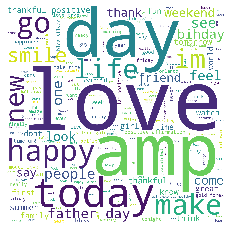

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
good_words = " ".join(train[train['label']==0].cleaned_tweets)
hatred_words = " ".join(train[train['label']==1].cleaned_tweets)

wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='white')
wordcloud = wordcloud.generate(good_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

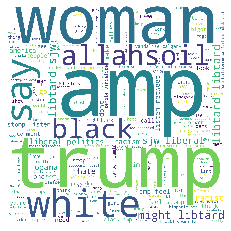

In [13]:
wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='white')
wordcloud = wordcloud.generate(hatred_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Vectorizing the words.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvz = CountVectorizer()
word_tfidf = TfidfVectorizer()
cvz.fit(train["cleaned_tweets"].values)
count_vector_train = cvz.transform(train["cleaned_tweets"].values)
count_vector_test = cvz.transform(test["cleaned_tweets"].values)

word_tfidf.fit(train["cleaned_tweets"].values)
word_vector_train = word_tfidf.transform(train["cleaned_tweets"].values)
word_vector_test = word_tfidf.transform(test["cleaned_tweets"].values)


In [0]:
train_vector = count_vector_train
test_vector = count_vector_test
target = train['label']

In [0]:
from sklearn.model_selection import train_test_split
trainx, valx, trainy, valy = train_test_split(train_vector,target)

Different Models.

In [0]:
from sklearn import naive_bayes
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.metrics import accuracy_score

In [18]:
model = naive_bayes.MultinomialNB()
model.fit(trainx,trainy)
preds = model.predict(valx)
accuracy_score(preds,valy)

0.9450631960956075

In [19]:
model = svm.SVC()
model.fit(trainx,trainy)
preds = model.predict(valx)
accuracy_score(preds,valy)

0.958828682267551

In [20]:
model = LogisticRegression()
model.fit(trainx,trainy)
preds = model.predict(valx)
accuracy_score(preds,valy)

0.9637091728194218

In [0]:
model = ensemble.ExtraTreesClassifier()
model.fit(trainx,trainy)
preds = model.predict(valx)
accuracy_score(preds,valy)